In [1]:
# this notebook mainly mearsures the relationship between sample rate/resample steps and estimation of theta and zeta
import Aggregation.sampling as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

game list loaded


In [2]:
alternatives = list(range(15))

In [ ]:
# create guassian dataset
ground_truth_utilities = [sp.random_normal_distribution(0, 1) for _ in range(15)]

In [3]:
ground_truth_utilities

[0.7521965892874168,
 -1.0131809815561912,
 -2.263388489111853,
 -0.5946160033323887,
 -1.3682266335386866,
 -0.07227425509125018,
 0.1218987133342364,
 0.8838074937532371,
 1.7143375031898513,
 2.036470081829468,
 0.7708306219517409,
 -0.9421970417038527,
 1.0712487667367339,
 -0.5029049302851527,
 -0.6963356867078897]

In [ ]:
# generate zeta matrix
personal_prefs = []
for i in range(100):
    personal_prefs.append([sp.random_normal_distribution(0, 0.3) for _ in range(15)])
personal_prefs

[[-0.07181547989135527,
  0.1341668014350653,
  0.07310071619848488,
  0.21403783337840573,
  -0.255921615550795,
  -0.3715196171281271,
  0.29827558115516367,
  -0.16098528383553048,
  0.02278684804727802,
  0.0993428320254085,
  -0.017792762233334796,
  0.04539882058375546,
  -0.10886017886371692,
  -0.1274971031429484,
  0.18520833676251655],
 [0.15092355022615056,
  0.26489888020081787,
  -0.2348378859143269,
  -0.14841330502028172,
  -0.39243170746530115,
  0.0196424506736216,
  -0.39650022339019003,
  0.36012783182746644,
  -0.07581901383868558,
  -0.07968741477668356,
  0.2602820544903621,
  -0.0548183523893513,
  0.4045574628133742,
  -0.061044555453690835,
  -0.050626672614463686],
 [0.09928422553200762,
  0.15147302111284242,
  -0.33805418497807954,
  0.23699375038763884,
  -0.07321757953473355,
  0.10151125609998678,
  -0.24090093395471113,
  0.1403509287579515,
  -0.05434560319699439,
  -0.09402275989365275,
  0.14283466931052918,
  -0.5618002402583075,
  0.3333665980163736

In [3]:
# reload gtu and pp
ground_truth_utilities = [0.7521965892874168,
 -1.0131809815561912,
 -2.263388489111853,
 -0.5946160033323887,
 -1.3682266335386866,
 -0.07227425509125018,
 0.1218987133342364,
 0.8838074937532371,
 1.7143375031898513,
 2.036470081829468,
 0.7708306219517409,
 -0.9421970417038527,
 1.0712487667367339,
 -0.5029049302851527,
 -0.6963356867078897]

personal_prefs = [[-0.07181547989135527,
  0.1341668014350653,
  0.07310071619848488,
  0.21403783337840573,
  -0.255921615550795,
  -0.3715196171281271,
  0.29827558115516367,
  -0.16098528383553048,
  0.02278684804727802,
  0.0993428320254085,
  -0.017792762233334796,
  0.04539882058375546,
  -0.10886017886371692,
  -0.1274971031429484,
  0.18520833676251655],
 [0.15092355022615056,
  0.26489888020081787,
  -0.2348378859143269,
  -0.14841330502028172,
  -0.39243170746530115,
  0.0196424506736216,
  -0.39650022339019003,
  0.36012783182746644,
  -0.07581901383868558,
  -0.07968741477668356,
  0.2602820544903621,
  -0.0548183523893513,
  0.4045574628133742,
  -0.061044555453690835,
  -0.050626672614463686],
 [0.09928422553200762,
  0.15147302111284242,
  -0.33805418497807954,
  0.23699375038763884,
  -0.07321757953473355,
  0.10151125609998678,
  -0.24090093395471113,
  0.1403509287579515,
  -0.05434560319699439,
  -0.09402275989365275,
  0.14283466931052918,
  -0.5618002402583075,
  0.33336659801637364,
  -0.16935637422288158,
  -0.044102535119815885],
 [-0.8360998566880748,
  -0.35078871655438865,
  -0.48083865285993954,
  0.06718988255514985,
  -0.3104311044797946,
  0.13278768105586164,
  -0.4971324391285754,
  0.07118122677508189,
  0.45031926616817797,
  0.010219241398727003,
  -0.3120321738147015,
  -0.5166245823274798,
  -0.10803149280787046,
  -0.39261415186716636,
  -0.1871527026080992],
 [-0.1238742611758725,
  0.2923894152376625,
  0.38900173609273514,
  0.034817406074815434,
  -0.20786461365309503,
  0.08071886175289124,
  -0.2840083115990793,
  -0.03248691327857349,
  0.27128379114263623,
  -0.07243287374023129,
  0.3546668013175205,
  -0.6584702690758554,
  0.2553873518560415,
  -0.6965655480858778,
  0.3074686483315191],
 [0.08156955441315292,
  0.02762550048022006,
  0.5939406180193973,
  -0.34272212504875815,
  -0.033808452359469776,
  -0.31348715311470693,
  0.16147227467373826,
  -0.008180344143900418,
  0.1940426578244773,
  -0.5207493587956051,
  -0.5440627626746611,
  -0.028219578236866064,
  0.19371023292171766,
  0.036410362224247296,
  0.09887671092954466],
 [0.19851098480206233,
  0.23022113442635828,
  0.07012058680215957,
  -0.2793010162488861,
  -0.024449460629769017,
  -0.18339547525954852,
  0.03649795903941147,
  -0.13699080745020267,
  0.39083489800273935,
  0.20192197094532702,
  -0.6103724098751467,
  -0.28047688207691684,
  0.29325304890395326,
  0.20899114465704555,
  0.25339426097418427],
 [-0.0015493263262635433,
  0.42886512285956246,
  -0.3172974767904775,
  0.41872175357896235,
  0.3494162137058442,
  -0.41114286965618635,
  -0.21145209573466014,
  -0.08012655246816255,
  -0.1569184447270179,
  -0.10223629408954402,
  -0.22010874401808367,
  0.2654272410399606,
  -0.4700345770522228,
  -0.10839919222762533,
  -0.24756315643285243],
 [0.1363161314192483,
  0.151546716658491,
  0.2045504943543852,
  0.2863642232777213,
  -0.11588440089492129,
  0.3848572228621003,
  0.07736172689775184,
  -0.2506809364315022,
  0.13400252797138623,
  0.4668551632682196,
  0.28144603561991205,
  -0.873347193584539,
  -0.39237958472199774,
  0.15254015745582505,
  0.337236636356103],
 [-0.5915871088148752,
  0.33630703098626075,
  0.021848993785480136,
  0.042186069283630404,
  0.2471290590769907,
  -0.30715585593038536,
  -0.19607522561055082,
  0.03935162679861492,
  -0.19449837953922902,
  -0.20095780752811374,
  -0.12246236260449839,
  -0.09910713178767518,
  0.14984067452682234,
  -0.24723321951576047,
  -0.5404133972329901],
 [-0.3315994950028825,
  -0.3257304642875971,
  -0.04922948245093804,
  -0.2604323572123797,
  -0.06497982879738355,
  0.002603966507936474,
  0.4047425509577575,
  -0.039784533461121006,
  -0.10865249793086426,
  0.16813883847285713,
  0.5704574467732445,
  0.329834872298739,
  0.06940063056437586,
  0.0974767911007408,
  -0.2284406968038228],
 [0.015333817630669488,
  0.12632506930381035,
  0.27001452558939515,
  0.0942993846527852,
  0.018644613411163434,
  0.07500658352391211,
  0.42770480486396323,
  0.025503922007427248,
  -0.21367795766041545,
  -0.08818139846407506,
  -0.35368646283295935,
  0.17917894967640305,
  0.0965608983043408,
  -0.11975925152450093,
  0.1673523572323902],
 [-0.2943234793050809,
  0.32659905431002445,
  -0.2601618966763692,
  0.015884417825345255,
  -0.3134885115506977,
  0.4718639818274868,
  0.2178532715869365,
  -0.056101838515264645,
  0.321216082228644,
  0.157411816637447,
  -0.3161005543632997,
  -0.30421179757655675,
  -0.376372218964975,
  -0.413099469733171,
  -0.044301620801771385],
 [0.1885322381737202,
  -0.24508529410508217,
  -0.2655781612244912,
  -0.3247551294992373,
  0.2595538748028259,
  -0.64661265654476,
  0.5167996459722305,
  0.27159539170961006,
  -0.1261097972954915,
  -0.27162376831162444,
  0.3469601594085452,
  -0.4340521777555629,
  -0.16378857711977124,
  -0.3340076143487906,
  0.272376586780722],
 [0.09531223250656638,
  0.05260410879614989,
  -0.2484008063939846,
  -0.11272544100304929,
  -0.009772243903212326,
  -0.15842817836187348,
  -0.33522265921829636,
  -0.4118008242542593,
  -0.136263683497459,
  -0.3501741362027981,
  0.03377147393052465,
  -0.19199441884149565,
  -0.41856942054090235,
  0.35299774529550504,
  0.526621267217812],
 [-0.00887521782754266,
  -0.34112362293794385,
  -0.37695937178141453,
  -0.701502029470516,
  -0.024750075307973133,
  -0.023845165793039188,
  -0.33715200567411907,
  -0.06843473807226723,
  -0.1011954297134468,
  -0.017765646595974693,
  -0.39505686563345727,
  -0.2888154684805702,
  -0.31693047101062205,
  -0.01193425330085101,
  -0.15308265383781242],
 [-0.4407189489325037,
  0.27566900152046786,
  -0.046743318149148644,
  0.3149538950967282,
  -0.14541364866945522,
  -0.4079227546235431,
  -0.13874196708087808,
  0.013068652462085923,
  3.440213616202326e-05,
  0.24076708276054362,
  0.20716911529975232,
  0.04674374892502408,
  -0.24367570473509068,
  -0.04167976999315475,
  0.03786901151923331],
 [0.08192393540812289,
  0.20553785208123432,
  0.15684949724418057,
  -0.44307785911163317,
  -0.06642015314400843,
  -0.13174591977604982,
  0.2231983754054174,
  -0.1067622908196249,
  0.1339288053982603,
  0.19031470612009457,
  0.054610277749130666,
  0.04936302449213051,
  0.21843275734374581,
  -0.6161463978496488,
  -0.17995825627144574],
 [0.3794151328372089,
  0.5033334230590671,
  -0.1906471573958163,
  0.24952538218313763,
  -0.1240807477132352,
  0.454936300269404,
  -0.500276059926266,
  0.14356177082875465,
  -0.046733044434507744,
  0.12257955356694326,
  -0.1870776909901133,
  -0.5463688962426684,
  -0.09685961292736094,
  -0.18763356511449855,
  0.11428643592205326],
 [-0.12382687802834748,
  -0.060899330343505094,
  -0.025344119973108252,
  0.0011379877058562712,
  -0.21511313541952518,
  -0.35215119902353437,
  -0.13873231823268328,
  0.25185480733076954,
  0.016823950815185278,
  -0.3258287122458524,
  -0.1720382353739713,
  0.15466329077943045,
  0.527295286033039,
  0.2330257242975312,
  0.17131137939097146],
 [0.131355415656796,
  -0.27473011376345857,
  -0.2534701851345625,
  0.1418738317424335,
  -0.22171183356610055,
  0.04381420171972264,
  0.10821975618477182,
  0.5667110573344931,
  -0.1709077843743222,
  0.2458546951209805,
  0.058345958362478786,
  0.034162495930795796,
  0.09224191669226144,
  0.06036057886800754,
  -0.20328747773372474],
 [-0.01368030558631886,
  -0.06407930000053129,
  0.3051966933182544,
  0.09978491922794486,
  -0.1897792371714628,
  0.3757344687021399,
  -0.03487649474550246,
  -0.5661994411583292,
  0.04728345525432349,
  0.32018749626107046,
  0.15636634332305882,
  -0.18897604523773084,
  -0.4057813419514448,
  0.07664418429488115,
  0.3625625041566513],
 [0.04542618416308831,
  -0.4437015386768014,
  0.17104495298098593,
  -0.18162537731958303,
  -0.5985922370700404,
  0.11690439521053232,
  0.20743913695614888,
  -0.0450722076440663,
  -0.2362224880113897,
  -0.30791094443420597,
  -0.18082606026375042,
  0.03592281498581995,
  -0.5376309021915053,
  -0.18047304029192954,
  -0.038089327226740556],
 [-0.12282619931087263,
  0.11644584198571999,
  -0.6646747619379237,
  -0.43964455154280674,
  0.10069503656189299,
  -0.5366153898214031,
  -0.7369017253306471,
  -0.41243590451556317,
  -0.05089291117417368,
  0.04436713610832733,
  -0.1333824730612082,
  0.1561425322423756,
  0.158381327525706,
  -0.3986879179708415,
  0.47330823871984484],
 [-0.0792838016944773,
  -0.06372839934376444,
  0.6661759518049329,
  0.06613772874305249,
  0.1656403390092189,
  -0.09085844347053383,
  -0.036580638524394006,
  0.587080494993822,
  0.3829347148320318,
  -0.06275866059467632,
  -0.10648649439656957,
  -0.31914262091826434,
  0.42276965006546746,
  -0.0987955604946904,
  0.036459910283200364],
 [0.099183467009331,
  0.01411062405714563,
  0.38945832104339956,
  -0.8132251794962551,
  -0.15327100860301732,
  0.2036895060244804,
  0.03771750382781377,
  -0.3854180843256132,
  0.428951078398701,
  -0.10832132791793551,
  0.09476948769093811,
  -0.22654093237928863,
  -0.05989938250362389,
  -0.1250524764103463,
  -0.24500721963369754],
 [0.18160335380904197,
  0.04826952299814352,
  -0.5810688565629166,
  -0.37022480279232417,
  -0.5188584527072785,
  -0.10304178409709601,
  0.44265908633779966,
  0.05300404073317521,
  0.3264514259086146,
  0.08073276493372787,
  -0.14991742473957462,
  -0.0332943444813506,
  -0.3738912061122949,
  0.04244932489992289,
  -0.1283666540449111],
 [-0.01456593580697523,
  0.006233006160592217,
  -0.08966959873610042,
  0.060299616028352654,
  0.34861520146776864,
  0.4010910188610383,
  -0.14557946501076272,
  0.23306624385979693,
  0.13756435513509901,
  -0.0015668451408468198,
  0.46716487483570834,
  0.5285803239023429,
  0.23416183168658106,
  -0.05591350749457253,
  -0.27126567499910864],
 [0.5161814649860768,
  0.17588050647668377,
  -0.24894760117255607,
  -0.05737106111734941,
  0.2911907681034052,
  0.20162612750742054,
  0.6268678241575535,
  -0.09423119630958388,
  -0.20727599856329634,
  -0.11492961396435226,
  -0.3870888310742792,
  0.3333525635896195,
  -0.3069910880433392,
  0.021657324985572508,
  -0.1522604975683514],
 [-0.32578603014974766,
  0.413643663342131,
  -0.12058374683767924,
  -0.22253857293356719,
  0.7396213828505027,
  -0.05701212922056463,
  0.4221959533321994,
  -0.24628018711141278,
  0.3183237174481785,
  -0.17073028363380205,
  -0.18854799579403853,
  -0.06664819607597756,
  0.39981192698480517,
  0.27676366030291577,
  -0.03653925792833736],
 [0.5365160497668949,
  -0.14739665588235892,
  -0.4226059300153752,
  -0.16989597640036627,
  0.08928164147089118,
  0.21006475382262096,
  0.0711750814990077,
  0.3283943028381615,
  -0.08746024177656649,
  -0.07152319731539034,
  0.3358263479017392,
  0.23106667881441953,
  -0.3141722479444592,
  0.2935774110451871,
  -0.3187019035763071],
 [-0.3208692692110103,
  0.2489606032662418,
  -0.05716804124327661,
  -0.10495722159410213,
  -0.4234305053367102,
  -0.3525946175982342,
  0.09935771724051744,
  0.06380194963412819,
  0.44086049418772916,
  -0.06830144564318152,
  -0.2529281333960634,
  -0.2719992080012449,
  0.20093877753665507,
  -0.13780958299313142,
  0.5316798907750575],
 [-0.5017037436628604,
  0.07177597804916908,
  -0.10111457351039158,
  -0.005602120250049281,
  0.4752252457028364,
  0.06539782344683029,
  0.2551092170926565,
  0.19204191507818752,
  0.10470672422766324,
  0.39281889451533564,
  0.2391107151919441,
  0.02946445396772746,
  -0.12393574022579175,
  0.2817779548970489,
  0.12857333361579268],
 [-0.5129411145102568,
  -0.28074319549902577,
  0.2262041055582082,
  -0.7231692842365941,
  -0.28942761349029444,
  -0.44868594562627134,
  -0.3681334900517655,
  0.4839347259430886,
  0.04741467447708175,
  -0.054167742419527556,
  0.3222778023158045,
  -0.8753126155700747,
  0.001442194040267172,
  0.2661346837034565,
  -0.1041228227577246],
 [0.24321059125479058,
  -0.08571114536018282,
  0.0320599451788859,
  -0.07758883612486366,
  0.0031042061117348826,
  0.4426423526778115,
  -0.1380079146595346,
  0.019358169619904064,
  0.20816320381144496,
  -0.13431627555952078,
  0.008901013788608957,
  -0.12792120413875813,
  -0.4121465450982406,
  0.5181118138031329,
  -0.3467462178328077],
 [0.15524347074305977,
  0.2186820207984634,
  0.10828034656642185,
  0.46342699905762164,
  0.19955616870977735,
  0.9226103830337912,
  -0.05178681150951791,
  0.059914457826479126,
  0.08409637511386116,
  -0.14854315011066294,
  0.042087993666290104,
  0.13910694545471167,
  -0.033238748048994474,
  0.2788293435418743,
  0.07432716592434276],
 [0.18776662582129633,
  -0.21163392096867595,
  -0.27232137146823027,
  0.038203171453627796,
  -0.04960953228621591,
  0.10171850778702139,
  0.4033475895287884,
  -0.2670255689715243,
  0.009877337466571922,
  -0.08909991355733582,
  0.3898277588934473,
  0.12772791876810347,
  0.37508295347560405,
  0.0003464551307858413,
  0.20209552632571692],
 [0.14874051703256277,
  -0.2532477505838742,
  -0.019589441704234392,
  -0.1305230636730174,
  -0.08323242633557648,
  0.3509774381731949,
  0.5453255033259686,
  -0.43844175615730063,
  -0.3093219222516506,
  0.6366386336873077,
  0.24369597531728504,
  -0.06784453584245681,
  -0.5450817924454011,
  -0.29991706030155785,
  0.03775706791365412],
 [0.027930068226766462,
  -0.13531120919024492,
  0.28688498825286013,
  0.21771705031056618,
  -0.1369534473492129,
  0.31068156453786494,
  -0.022885206488289882,
  0.027512741030658854,
  0.4269830891946201,
  0.2799402348920461,
  -0.3499911710906112,
  -0.6152936210389084,
  -0.01061242040078762,
  0.05121887887879829,
  -0.3001400352198692],
 [0.5307619150667579,
  0.422196464763228,
  -0.32264144772906084,
  -0.45944483629588695,
  0.499176126106174,
  -0.2278159379666078,
  0.34141203704310563,
  -0.21427212886641547,
  -0.1110847347156009,
  -0.16747879803155993,
  -0.3101723742483732,
  0.42588040890280165,
  -0.812857497462146,
  -0.15342005349199495,
  -0.04568514292441189],
 [-0.12680373749134427,
  -0.38059950154911326,
  0.092565822690338,
  -0.08915369744454162,
  0.15429818638021264,
  0.27717937211004773,
  0.618490389294917,
  -0.7796492741870554,
  -0.20960495770158924,
  -0.15749694692023744,
  0.09900718666742918,
  0.4822566216823098,
  -0.2915760424027275,
  -0.10657522210940347,
  -0.10961683255571504],
 [0.029053776940581415,
  -0.5425869777172094,
  -0.5783036147317914,
  0.7027881805485809,
  0.06162754939770434,
  -0.014261257062437575,
  0.1260100480847072,
  -0.15086654593171261,
  0.3443843236297826,
  -0.31244942411212817,
  0.25065738095227225,
  -0.06160676378099256,
  0.21677118151270067,
  0.025799533165528483,
  -0.2041566431570215],
 [-0.4092027948495279,
  -0.429590288983594,
  -0.1460500904418166,
  0.10523239584964438,
  0.29648699306612286,
  0.04347521292067255,
  -0.3464773996657731,
  -0.5242381076950045,
  -0.10338347165133556,
  0.2147231218943421,
  0.017840127760300438,
  0.06210727460543732,
  -0.12559589326039228,
  -0.294786066131714,
  0.022742453332864395],
 [-0.14653661376274513,
  0.178256939874685,
  -0.32484352268193123,
  0.18763308062519435,
  0.14356169359114965,
  -0.0670674979429235,
  -0.5591328503598453,
  -0.0023898784308725536,
  -0.5192370999596851,
  0.4750608773339221,
  0.14409236265192613,
  -0.026873392057109764,
  -0.2630573394456805,
  -0.3594973252398957,
  0.1335635613719109],
 [-0.694815142852179,
  -0.20092088321901105,
  0.20811341551198745,
  0.0021185335864502062,
  0.17473671258261822,
  -0.08668748060075501,
  -0.055788283722046236,
  0.42988751552958016,
  0.3842603988162732,
  -0.16469505790250297,
  -0.010756193528036381,
  -0.10249859596605111,
  0.22396027469493937,
  -0.1301597964466831,
  -0.13883736563164337],
 [0.037217636783838846,
  -0.28668427534934476,
  -0.336918666020814,
  0.3970669388541703,
  0.5069071847828629,
  -0.3089596386155156,
  -0.2701996276612195,
  0.12466152388388294,
  0.45813048189743305,
  0.06305402112828663,
  -0.3841544535159818,
  -0.12629759962984385,
  -0.26786335629835034,
  0.012870730356010326,
  -0.3471983870327424],
 [0.05022995922259462,
  -0.70375457143127,
  0.017837505909580605,
  0.13547183996386097,
  0.24145459749980258,
  -0.14457734173991313,
  0.03277350957017637,
  0.5605283095586125,
  0.26741957567586405,
  0.19568071918184926,
  0.18511726128086314,
  -0.19656019808036082,
  0.3079107847721972,
  0.009205801250909513,
  -0.044757644122359726],
 [-0.221163082320793,
  0.2479849485359658,
  -0.0974677328700836,
  0.11008353510259418,
  0.3182825892391513,
  0.1675924248382243,
  0.2533795872576113,
  0.1398942925748338,
  0.05534439874751504,
  -0.41013030722765126,
  -0.13170200638174706,
  -0.12395941801053614,
  0.7116820904435587,
  -0.06423635602604422,
  0.6913605340438326],
 [-0.27233397580163327,
  -0.06807528209128808,
  0.4081551017683206,
  0.0014863868527051985,
  0.2021564262123004,
  -0.10779001199642732,
  0.027277566526473195,
  -0.6271815602233389,
  -0.5551290026949288,
  0.12155526598776886,
  0.213610913298149,
  -0.32478699230793673,
  -0.24567989491152162,
  0.13262494099607808,
  0.08213146384297661],
 [-0.155977318802356,
  -0.411044742752755,
  -0.5722502077135098,
  -0.13758270800348074,
  0.05682832239882374,
  0.38056290086764794,
  0.21201261386437495,
  0.06805556801146846,
  -0.1628580525597286,
  0.850627479033288,
  -0.12286895778136805,
  -0.17562810988313587,
  -0.3020995603859444,
  -0.3548509282438102,
  -0.17316486852683297],
 [-0.49705238555484443,
  -0.05249525413037513,
  -0.1294337025670568,
  -0.056146655536264474,
  0.6080738271784997,
  -0.2631193775880793,
  -0.3866892698871039,
  -0.11400043924375336,
  -0.5352439047781978,
  -0.35629524715531136,
  -0.22298241521802992,
  -0.17291818210927754,
  -0.01266190471143957,
  0.7480658885822724,
  -0.3357212050574177],
 [0.2244189539362578,
  -0.12849336215854557,
  0.2414853751542294,
  -0.15732104023247728,
  -0.10098524152434371,
  0.29200493677557193,
  -0.32976888159894685,
  -0.16050109900057827,
  -0.49868915670772795,
  -0.08680798476214678,
  -0.07725854335237822,
  0.15172566357212294,
  -0.41469930403695626,
  -0.1043063066628797,
  0.25833153929001484],
 [0.1627755393781009,
  0.05496800659290709,
  -0.11624461651734223,
  0.06807706157502433,
  -0.26852214997387824,
  -0.2477634035324684,
  0.17476096466265242,
  -0.24453717864153518,
  0.2901533162876829,
  -0.4210759654922353,
  -0.15492638761332203,
  0.108711260668235,
  0.12543811793749293,
  -0.42220988898899176,
  -0.6676186878226288],
 [-0.3657576314716068,
  -0.007150916223199235,
  -0.1425086438981038,
  -0.35731500213610873,
  0.4582808315746066,
  0.07163474465896147,
  0.5759756729691453,
  -0.5987293060700433,
  -0.18730245219116623,
  -0.04422602492547217,
  -0.3055733067729496,
  -0.29343423607779867,
  -0.1356002673620599,
  -0.4481483722597145,
  -0.49129445047813713],
 [-0.11735787042826756,
  -0.20932934175703208,
  0.19806542996257628,
  -0.041307073946810435,
  0.038281780415776914,
  0.07259225001151393,
  0.4386767430103352,
  0.19279486508030738,
  -0.2861139595578811,
  0.07202891350051432,
  0.3910066252878077,
  0.10356714497585769,
  0.4977321688273548,
  -0.004561875419355437,
  0.09263926370241655],
 [-0.19466879802960796,
  -0.4220970908819303,
  -0.030076773376115338,
  -0.17677768810452407,
  -0.10849622427059767,
  0.0701225341932792,
  0.1509196110414631,
  0.2591868428094841,
  -0.08710446015126708,
  -0.019108343578455606,
  0.3293759505853105,
  -0.3580153122662925,
  -0.33008083844834335,
  0.48974181288483737,
  -0.7909193735271799],
 [-0.5147334334383965,
  0.012711127158110737,
  0.28929374912911293,
  -0.11240277952954138,
  -0.22719677977042188,
  -0.029047764932514833,
  0.046085128118755335,
  -0.2531581539715346,
  0.1872393226103786,
  -0.27000981118357253,
  0.07414981421053812,
  -0.26489510688816054,
  0.1132551127861847,
  -0.37860836968964656,
  0.18751735348341406],
 [0.2441945213390859,
  -0.028467768003383298,
  -0.1491884129200192,
  0.25814753298021736,
  -0.1465227034948314,
  0.014051371470029047,
  -0.17068856083553516,
  -0.17618189725831065,
  0.4062755292555539,
  -0.13477169138974826,
  0.5339973808657809,
  0.04664250770562756,
  -0.10878585899242536,
  0.04233917884484706,
  -0.2836303133914812],
 [0.0003983748395217836,
  0.1114588195048914,
  0.35479046990688373,
  0.07474715505163666,
  -0.5342497359561187,
  -0.09195060249712139,
  -0.2663377581272283,
  -0.2857235857031924,
  -0.30586241835541034,
  0.5701763711811368,
  -0.017483095866502856,
  0.4815954831727358,
  0.3365503670152333,
  0.28506376487321594,
  0.264355164619957],
 [-0.1002029475611124,
  0.147796594130295,
  0.00402692939993823,
  -0.17101627523644403,
  -0.4448285137898506,
  -0.43971683959086144,
  -0.24912261983753498,
  -0.07636638945405318,
  0.2709913874288559,
  0.4706427904321679,
  -0.061939061251145205,
  0.2567155390622693,
  0.27544200179856637,
  0.1798800318771762,
  -0.02024235148460774],
 [0.07459866388045788,
  0.07601381124715821,
  0.2536956062220905,
  0.25784743485244177,
  0.21833274262128285,
  -0.3014390577793123,
  -0.022317748427917124,
  -0.2788211260151453,
  -0.05493431434195468,
  0.08737817199244466,
  -0.17184138471048166,
  -0.38535093778914553,
  0.1996229884632134,
  0.11592402870898005,
  -0.1888047380858183],
 [-0.3528244451737355,
  -0.4646518574156436,
  0.3326089392575913,
  0.4531668285205475,
  0.14013072596480317,
  -0.3695431230501322,
  -0.009751557837739382,
  -0.23636885101750427,
  0.027874742305462243,
  0.22244178957412428,
  0.10209831760232195,
  -0.05196170141739934,
  -0.2528358559255613,
  0.3466693471629888,
  -0.1243794527817948],
 [0.2932482421751367,
  -0.382517373550973,
  0.5396501518608525,
  0.1385554782356848,
  -0.05394223258270706,
  -0.21459486421991317,
  0.05438832526648999,
  -0.13560564852770896,
  0.34467290212962204,
  -0.03359024332448633,
  -0.5331224658783071,
  -0.07128198967011246,
  -0.023044018490165245,
  0.3376318624786298,
  0.7051058941584839],
 [0.34377137756318493,
  -0.30375172468835837,
  0.06364383664031728,
  -0.27310540140616374,
  -0.32714093570700536,
  0.12093995944084676,
  0.024766343786395983,
  0.059992150737156504,
  -0.16365301980010477,
  0.31064313523733283,
  0.20421514735991705,
  0.1533855531141857,
  -0.06686239258079983,
  0.07781284121661608,
  -0.3233232391161808],
 [0.19210252789345625,
  0.3387982808029477,
  -0.05484560236183283,
  0.2168918997919323,
  -0.18824938982133718,
  0.055511872577191854,
  0.43042738490969706,
  0.08649806463157135,
  -0.12797819711047914,
  0.10194463764149565,
  0.12853970218061675,
  0.3028672303486722,
  0.268122117183762,
  -0.19088267591250493,
  0.21582518464715228],
 [0.22800845499356914,
  -0.26317966436047696,
  0.2248561234739669,
  0.0007343338828444218,
  -0.03284166446828112,
  -0.04426830778407615,
  0.4905744324409111,
  0.4648764994825745,
  0.018740093252484005,
  0.09323740429647448,
  0.16194024563029794,
  0.006894724007323063,
  -0.305207285193646,
  -0.18995574281606117,
  -0.05007122961083917],
 [0.13404460804290247,
  -0.12890636060929925,
  -0.21880915197199913,
  0.2837400371655777,
  0.014253594395642194,
  0.16154417978432248,
  0.5501471080529725,
  -0.03350447239680322,
  0.14761244605470392,
  -0.21637368876232108,
  -0.4341181675606791,
  0.47880471088403415,
  -0.3469097752595729,
  -0.14846152059662637,
  0.23687259612898487],
 [-0.1529387449777553,
  -0.2171570911649478,
  0.3538039251732961,
  0.20971001342134224,
  -0.017586627110758517,
  0.19315489734456226,
  -0.6352484874633603,
  0.05671716291967832,
  0.15251567656987147,
  -0.03462216379881648,
  0.5357105985285463,
  0.3027049620346633,
  0.22750165624515278,
  -0.05947888343017427,
  -0.3150941110360242],
 [-0.31646959662000346,
  -0.485279854517756,
  -0.1400974421929573,
  -0.2646293120010084,
  -0.047437136011292354,
  0.3486612740789241,
  -0.2955619752189038,
  0.09381951284269388,
  -0.026026845948746716,
  -0.07853110793147443,
  0.011441868198331614,
  -0.7930955508022184,
  -0.3333441858323846,
  0.38589777617511717,
  0.03619469099167009],
 [0.18405235881919585,
  -0.1240715126048593,
  -0.022619725128896092,
  0.4152824438404308,
  -0.055517485248431905,
  0.1438849477695015,
  -0.38562572187075,
  -0.15904423710483398,
  0.37152440125691705,
  -0.0583939988255865,
  -0.36042208677729914,
  0.09054735531921942,
  0.19877901109717247,
  0.21745138210716639,
  -0.3582174120493399],
 [0.1757062311167098,
  0.09016698243688123,
  -0.05676845865472496,
  0.09678253518835428,
  -0.020145886866303832,
  -0.020970373543532542,
  0.07350650604845749,
  0.4419753710323348,
  -0.35231591492103465,
  -0.012076641092346565,
  0.2560989940633559,
  0.2633111671798526,
  -0.02647727389577902,
  0.061666891032234994,
  0.043718474158633766],
 [-0.1359352784465715,
  -0.4695643577989757,
  -0.16481811752624212,
  0.12516267265599051,
  0.723257215205143,
  0.47042913762247796,
  -0.20185811623490674,
  0.4492458375165346,
  -0.020186196911394883,
  -0.2248622809623729,
  -0.09714782209839073,
  -0.1925796266698442,
  -0.10109558119053673,
  0.07959204362716252,
  -0.06114461509817973],
 [-0.4028228324388955,
  0.3245793214245645,
  -0.0170310630145366,
  0.0445410968518781,
  -0.045007746162674965,
  0.2175205661612286,
  0.3649760143694748,
  -0.5367536868483362,
  -0.24786266105015098,
  -0.30326310162060865,
  0.043227557590393435,
  -0.3450254603652269,
  0.08062686372636145,
  0.11835634832345338,
  -0.14541970665024218],
 [0.24580539234117083,
  -0.11470991991743437,
  -0.3026232448774873,
  -0.6107344075930133,
  0.05039626148841026,
  -0.08911595281380748,
  -0.2936627492504887,
  0.1812667909706586,
  -0.047495244680870664,
  -0.33014856112300184,
  -0.21613709382104915,
  -0.4323055090542361,
  -0.11906434553968313,
  -0.14113698429856286,
  0.5914007975352206],
 [-0.5497705699664958,
  -0.17151617273661243,
  -0.24239266143385724,
  0.31446742532299893,
  -0.030647544833288735,
  -0.08181800468254853,
  -0.4256552087065079,
  0.7615364966547747,
  0.15295901793361383,
  -0.15104663391848225,
  0.21624985366887753,
  0.11811974764836498,
  -0.0035242788160016825,
  -0.07941513746327293,
  -0.32322419593779667],
 [-0.21596233350457925,
  0.7501118391570594,
  0.16276769746207392,
  -0.06272247732772564,
  0.2970199426599299,
  -0.09316006883206947,
  0.12345565312013451,
  0.023768929691059537,
  -0.06831240223618472,
  0.009990541788292439,
  0.21679803962048952,
  -0.16354660088579318,
  -0.40459039428888116,
  0.5601421067942249,
  0.31380801862510094],
 [-0.5595026096011104,
  0.42518864307134074,
  0.5331868397243141,
  0.4314845379968662,
  -0.4014803075296091,
  0.5226755155344521,
  -0.09445194415088665,
  0.24075015569321281,
  -0.17210982721329723,
  -0.01004556632279045,
  0.04367232314272461,
  -0.1730506964655624,
  0.23609991206614364,
  0.06849120020377221,
  -0.3354154714655412],
 [0.12180696252895709,
  0.17839361661835643,
  0.21599952938723377,
  -0.08131729298839964,
  -0.23222794913823314,
  -0.1671539986991964,
  -0.10058328012223232,
  -0.869021122202727,
  0.07342610559789273,
  -0.3210167887519356,
  0.06806833311866754,
  -0.019766794997402908,
  0.5263336888626885,
  0.07270438092890062,
  0.3155987311429489],
 [-0.3215514079390131,
  -0.0506649845490166,
  0.5760060148317453,
  0.08321276821916371,
  -0.36494144225126574,
  0.09876292776264599,
  -0.07102994624531117,
  -0.31411052932698785,
  -0.5522285896076694,
  -0.32966193597306165,
  -0.0012438263615739183,
  0.30622133643139904,
  0.0067426016093362915,
  0.21567145217855765,
  0.16051620916352552],
 [-0.2896281078147376,
  -0.029817413193318196,
  0.5233273524506272,
  -0.17543716725626743,
  -0.18227526325156349,
  -0.212135014599059,
  0.17385816806800233,
  0.44805850024896776,
  0.093471652074377,
  -0.20718375194796534,
  0.04800589357104641,
  -0.14256420942223413,
  0.4933562547439301,
  0.44595290140330585,
  0.23970585148146673],
 [0.07519005694654869,
  0.5619437171329897,
  -0.2724371007728632,
  -0.31723515897026566,
  -0.005293614164872376,
  -0.13527070470832958,
  0.31356700416837063,
  -0.12774363227326127,
  0.3909485402600655,
  0.3543334201381949,
  0.17476674919902477,
  0.08449381066131915,
  0.12501971132940967,
  0.5528234786555395,
  -0.5477053634478964],
 [0.15983402855914686,
  0.005562854565610802,
  -0.020788787402578907,
  0.07230999639553362,
  -0.1968949760211246,
  0.2839435989864518,
  -0.7033977354925413,
  0.2384267954584125,
  -0.14060043729469926,
  0.09495453292322589,
  -0.3105367585580943,
  0.28572364195487304,
  0.56964003529035,
  0.1674650040821335,
  -0.033497129880051144],
 [-0.21757784684396372,
  -0.16438551924060138,
  0.138609531588999,
  -0.2899768461411492,
  -0.43975036168183046,
  -0.5045154569750859,
  -0.4236058981252461,
  0.08882088658063385,
  0.009554445830148361,
  -3.0112903860768528e-05,
  0.33672081053311675,
  0.31693633578695685,
  -0.578854510016399,
  -0.0648805309013517,
  -0.5264021964557701],
 [-0.22896710842647855,
  0.11527496535908785,
  0.01241001231466126,
  -0.6172897077663487,
  0.18588287510397536,
  0.04437554253958372,
  -0.5600836810209452,
  -0.5186865937321958,
  -0.35493713770226365,
  -0.34877008498151424,
  0.32768834245024714,
  -0.1461427707231474,
  -0.27488890106665403,
  -0.22670487299101594,
  -0.5995347083023299],
 [-0.02914995113690668,
  -0.1687420733293,
  -0.10544664508428,
  0.3908305827276795,
  0.39986501733665075,
  -0.017688646451144503,
  -0.30455434866994124,
  -0.2835506014779458,
  -0.30882489376312333,
  -0.36373360052675585,
  -0.5142370083686664,
  -0.064504280958435,
  -0.22932223815547476,
  0.4595331265417116,
  -0.4768205286377275],
 [-0.028617629861582356,
  -0.3807234598902066,
  -0.17243568322170733,
  0.021228308232483117,
  0.00815625006066572,
  -0.15971628167834284,
  -0.30845277873915783,
  -0.23078686225872425,
  0.14038434997474553,
  0.12910546555760202,
  0.009354271910640873,
  -0.00470117612141203,
  -0.03331951740420407,
  0.18951821733451307,
  -0.4780153592110712],
 [-0.10526484499784312,
  0.018272725441309732,
  -0.27035438952965596,
  0.1922903634455442,
  0.11567433968771916,
  -0.20081814665788403,
  -0.3711448150389756,
  -0.3362512451515329,
  0.47933190823981403,
  -0.2075750263170207,
  -0.17968766961275145,
  -0.30250441437384445,
  0.03516455066407989,
  0.18581577788052633,
  0.4313193136335733],
 [0.06607137986126435,
  -0.0396654970587829,
  -0.12501769388331233,
  0.16485990259513758,
  0.27280843310656205,
  -0.25225455791698514,
  0.20434391645540126,
  0.06136911538244139,
  0.3016416667521733,
  0.1680291287116837,
  -0.39433739774441173,
  -0.20619446788236132,
  0.39212827584879545,
  0.14759062811204937,
  -0.037913279711627314],
 [0.18370895187000807,
  0.21580590230255692,
  0.9226341783405878,
  -0.06727944455656083,
  0.03584407964976874,
  0.2779173329878679,
  -0.13888808031428276,
  0.07759361784447721,
  -0.11020110764827303,
  -0.11252953283120815,
  -0.17051086372074636,
  0.22646536251216345,
  0.06609732400169784,
  -0.08612535485878453,
  -0.425625927191019],
 [0.4948922061763305,
  0.5049916313411272,
  -0.06207786229742536,
  -0.05835390031098701,
  -0.28615370201073326,
  -0.33821291877642234,
  -0.19793791046798295,
  0.16523518884167906,
  -0.19295603193376867,
  -0.09331628782985515,
  0.30438612854782526,
  0.3035365974167628,
  -0.25059010294076073,
  -0.2134353734495167,
  0.038688636665682334],
 [-0.18082826749025357,
  -0.15721607864463472,
  -0.4132144679869439,
  -0.19176545931637404,
  0.23462582612019478,
  0.06343707252973033,
  -0.0863316628231257,
  -0.18280973926193497,
  -0.43107911858035086,
  -0.4770630698852555,
  -0.0898148079611132,
  -0.5944871265806896,
  0.42130892501935596,
  -0.1986904885649352,
  0.05919532545443336],
 [0.25023399855054895,
  0.08956846626505033,
  0.00809029388361307,
  0.05077861111338607,
  0.5191566019133858,
  -0.42445967086398095,
  0.2684659005473064,
  -0.34868076486480487,
  0.43537305286727623,
  0.0745507641445517,
  -0.036144146927631876,
  0.9270364367981233,
  -0.3948253400325935,
  0.22001902527510805,
  -0.28533024347812025],
 [-0.4681271384698178,
  0.2795177742041805,
  0.12632413224506064,
  0.17769774799881372,
  0.12185550038766749,
  -0.07369851977300111,
  -0.3472494849749461,
  -0.5167242365942423,
  -0.6299480159253056,
  -0.4422829863082125,
  -0.026609709054974257,
  0.18447965369774946,
  0.2061010588569118,
  -0.14262196501046234,
  0.2277947284163304],
 [0.1507507394306038,
  -0.494539283664605,
  0.27357834908153206,
  0.07832199935123252,
  0.09808276486299959,
  0.44528402340507434,
  -0.32571726516955285,
  0.36794584201755437,
  0.4629000451738185,
  0.2819328087704048,
  0.06930071768943115,
  0.046139559821315866,
  -0.021712948053961567,
  -0.12173869593138996,
  0.09534364350561092],
 [0.29858220372078675,
  -0.6805435356917809,
  -0.09863125895181662,
  -0.5289226187213802,
  0.5391252607101412,
  0.24172021377012345,
  0.22581786736304263,
  0.03299971099844979,
  -0.04439367817340231,
  0.3104838994781535,
  -0.036465092521511,
  -0.13064229422926799,
  -0.08172105415677783,
  -0.143234587640988,
  -0.4101006487670749],
 [0.13458624448871298,
  -0.010506868033276112,
  0.14166937489067472,
  0.3204136245107969,
  0.4453127627910118,
  -0.41805170819376913,
  -0.18076695227757028,
  0.3059216851199158,
  -0.015853238113533473,
  0.17454097752765485,
  0.4342696993970649,
  0.5312119659659117,
  -0.21563770075496394,
  0.3673415347095225,
  -0.2045199294711356],
 [0.14780342677072592,
  -0.1100814228371337,
  -0.15560977780669058,
  -0.13904274558546142,
  -0.07147998083292376,
  -0.33625842567783143,
  -0.002115272240236607,
  0.22430931033787618,
  0.22782223936284687,
  0.07101167624391662,
  0.11009505177528432,
  -0.14007482148371314,
  0.33543409614066005,
  0.11898542110373155,
  0.0071731518065751045],
 [0.171227081078798,
  -0.4368698164368751,
  -0.2398763108822057,
  -0.4748318586528503,
  0.6378051986227048,
  0.3969907257097802,
  0.1518939394144126,
  0.14969990490922677,
  0.25848240100125713,
  0.046520663351349974,
  0.3134504509595127,
  0.3073892186428869,
  -0.5330103112392829,
  -0.592872154016908,
  -0.3560846437416353],
 [-0.20582577251279408,
  0.3725350035460047,
  -0.2970438075908275,
  -0.2024732316472492,
  0.32247310411348645,
  -0.09338347793808206,
  -0.02852661374260171,
  0.17044379444452928,
  -0.8799940918286175,
  -0.39469627787726497,
  0.2772113931399766,
  -0.28607623553719164,
  0.33504045518246045,
  0.5520303146621487,
  -0.2698170731176779],
 [-0.6056822379122425,
  -0.509172555226123,
  -0.22389567155253054,
  0.36962541531411564,
  0.3515764158044005,
  -0.05195647031323642,
  0.6664655179304422,
  -0.39309661250779043,
  -0.23530721365469456,
  -0.11255148548055971,
  -0.048367255502121696,
  -0.8189802066922943,
  -0.05548849686020516,
  0.2743680488679829,
  -0.4521441157664189]]

In [4]:
ground_truth_order = sp.order_generation(ground_truth_utilities)
ground_truth_order

[9, 8, 12, 7, 10, 0, 6, 5, 13, 3, 14, 11, 1, 4, 2]

In [5]:
def spearman_rank_correlation(list1, list2):
    n = len(list1)
    rank_list1 = [sorted(list1).index(item) + 1 for item in list1]
    rank_list2 = [sorted(list2).index(item) + 1 for item in list2]
    d = [rank_list1[i] - rank_list2[i] for i in range(n)]
    d_squared = [i**2 for i in d]
    return 1 - (6 * sum(d_squared)) / (n * (n**2 - 1))

In [6]:
gtu_np = np.array(ground_truth_utilities)
pp_np = np.array(personal_prefs)

In [7]:
ballots = []
for i in range(100):
    personal_utils = [ground_truth_utilities[j] + personal_prefs[i][j] for j in range(15)]
    ballots.append(sp.order_generation(personal_utils))

In [8]:
resampling_rss = [0.05 * i for i in range(1, 21)]
keep_rates = [2 * i for i in range(1,21)]

In [ ]:
#variables to store results
theta_errors = np.zeros((20,20))
zeta_errors = np.zeros((20,20))
spearman_coffs = np.zeros((20,20))

In [10]:
for i in range(20):
    for j in range(20):
        log = sp.theta_estimation(ballots, alternative_number=15, iteration=50, sampling_rate=keep_rates[j]*5, keep_rate=keep_rates[j], resampling_rate=resampling_rss[i], resampling_step=resampling_rss[i], verbose=False)
        theta_error = np.mean((log[49]['theta_estimation'] - gtu_np)**2)
        zeta_error = np.mean((log[49]['zeta_estimation'] - pp_np)**2)
        spearman_coff = spearman_rank_correlation(ground_truth_order, sp.order_generation(log[49]['theta_estimation'].tolist()))

        theta_errors[i,j] = theta_error
        zeta_errors[i,j] = zeta_error
        spearman_coffs[i,j] = spearman_coff
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


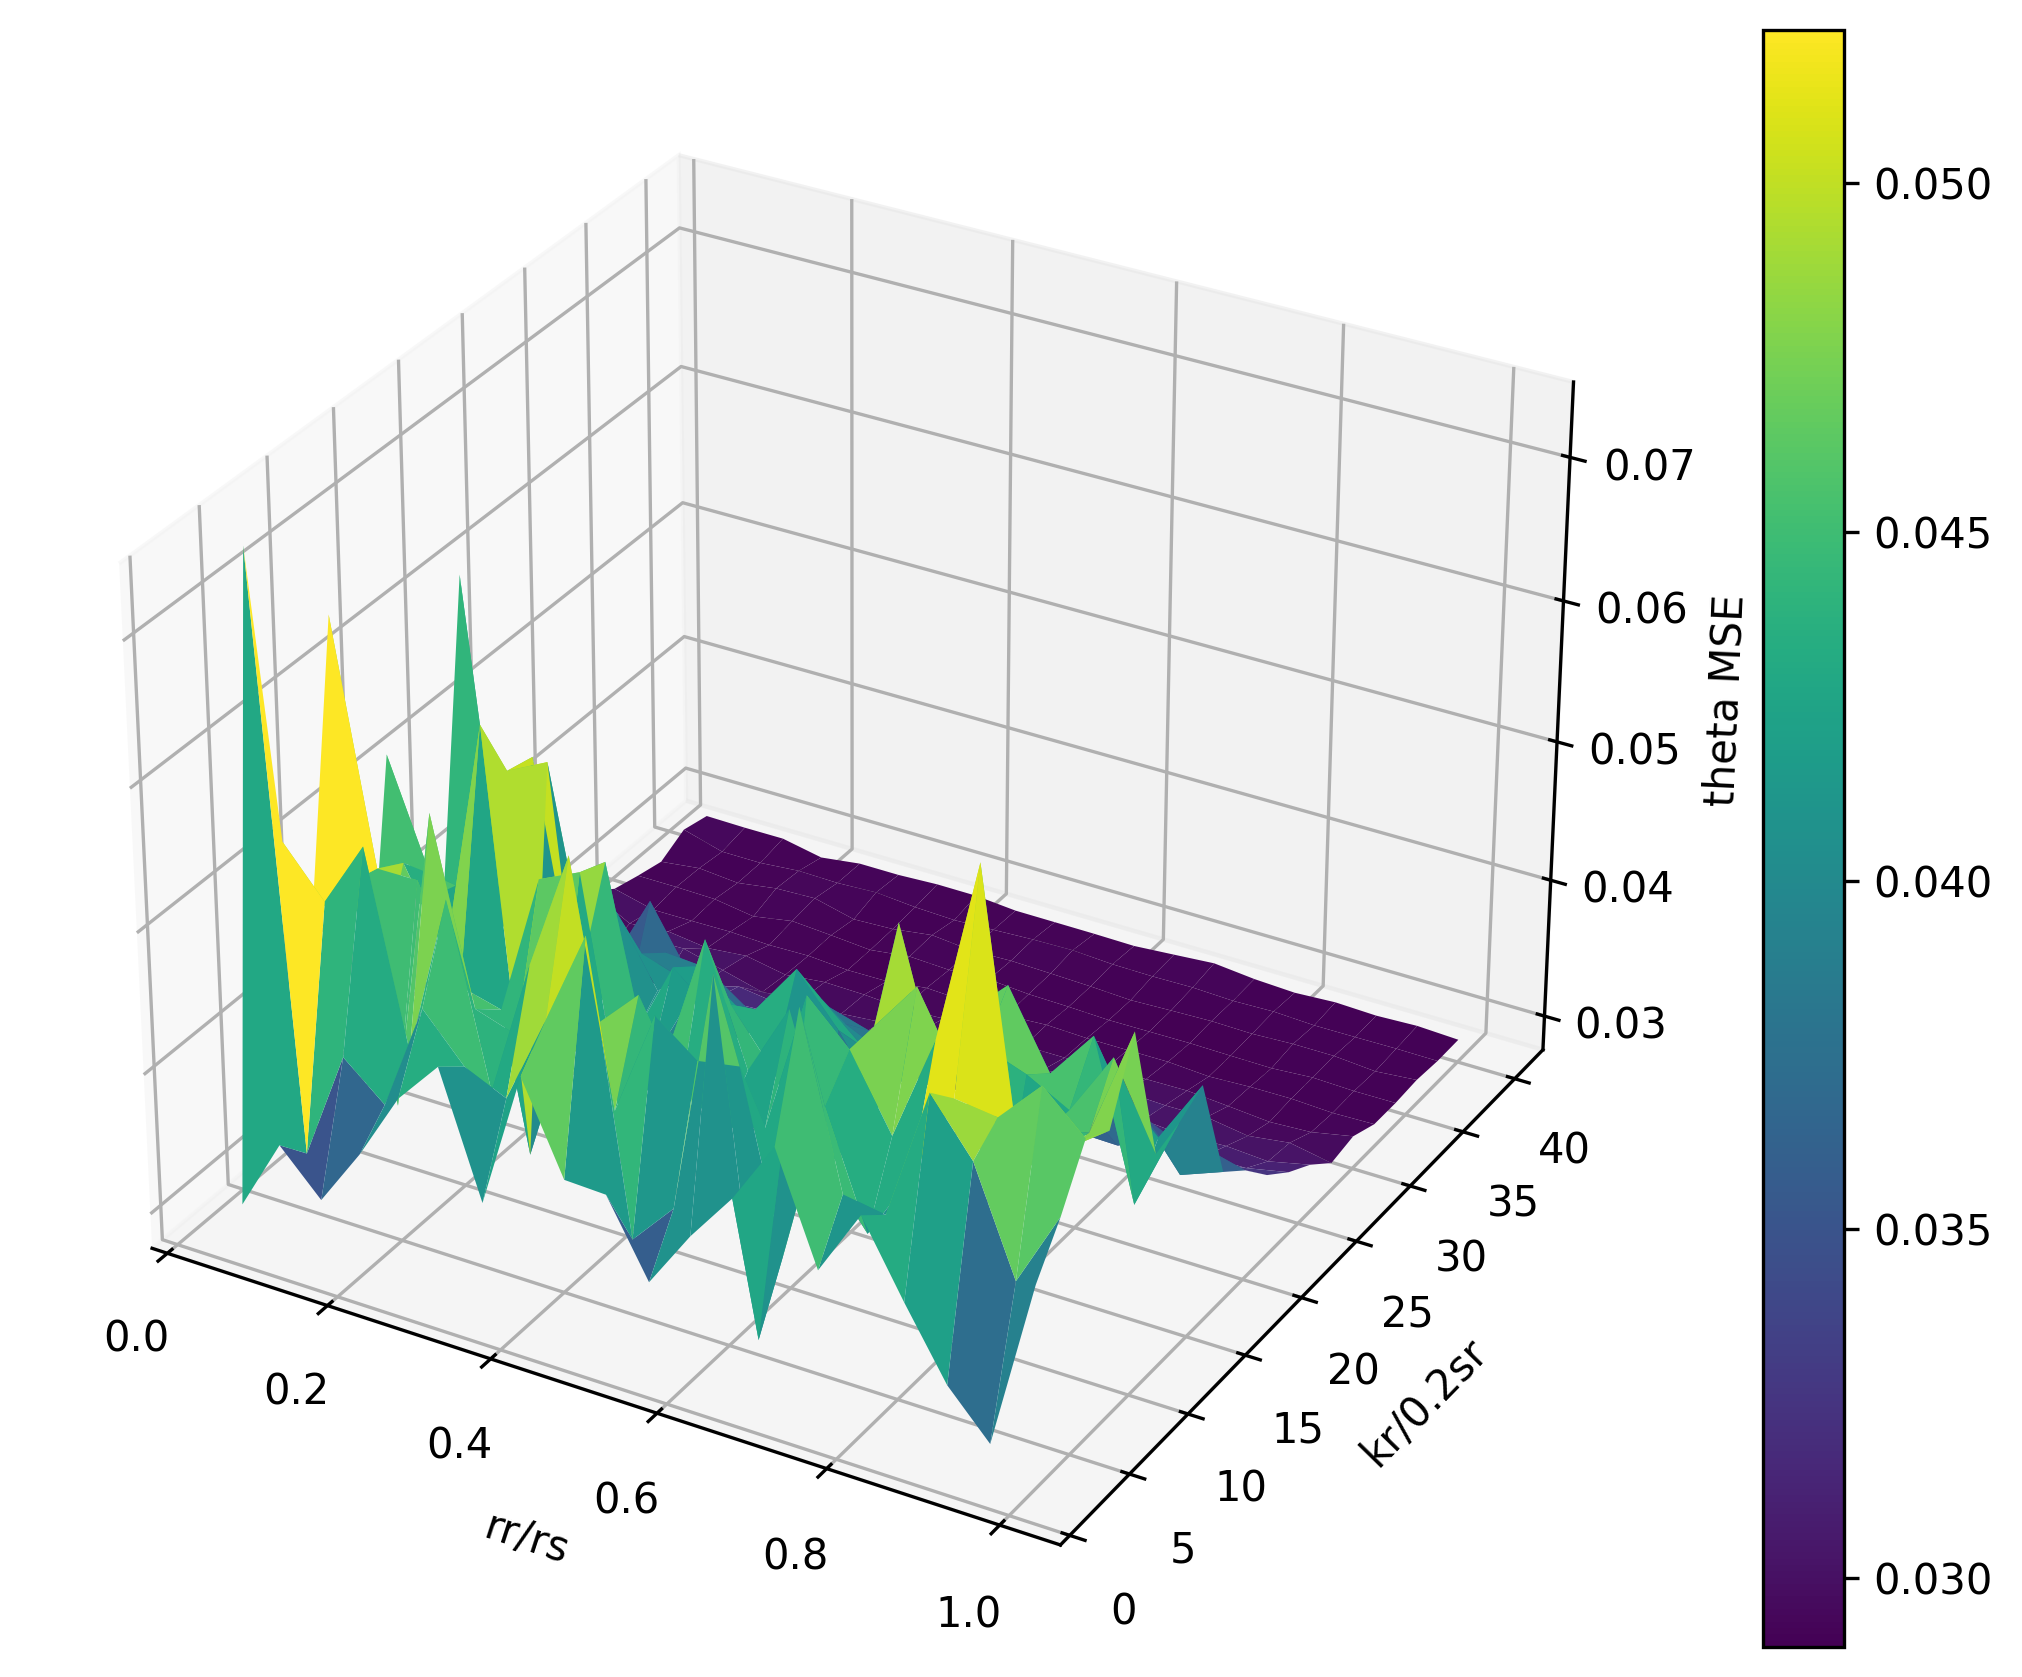

In [16]:
resampling_rss_np = np.array(resampling_rss)
keep_rates_np = np.array(keep_rates)
X, Y = np.meshgrid(resampling_rss_np, keep_rates_np)
Z = theta_errors

fig = plt.figure(figsize=(10, 7), dpi=300)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

fig.colorbar(surf)

# Labels
ax.set_xlabel('rr/rs')
ax.set_ylabel('kr/0.2sr')
ax.set_zlabel('theta MSE')

# Save the plot with high resolution (PPI 300)
#plt.savefig("3d_surface_plot.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


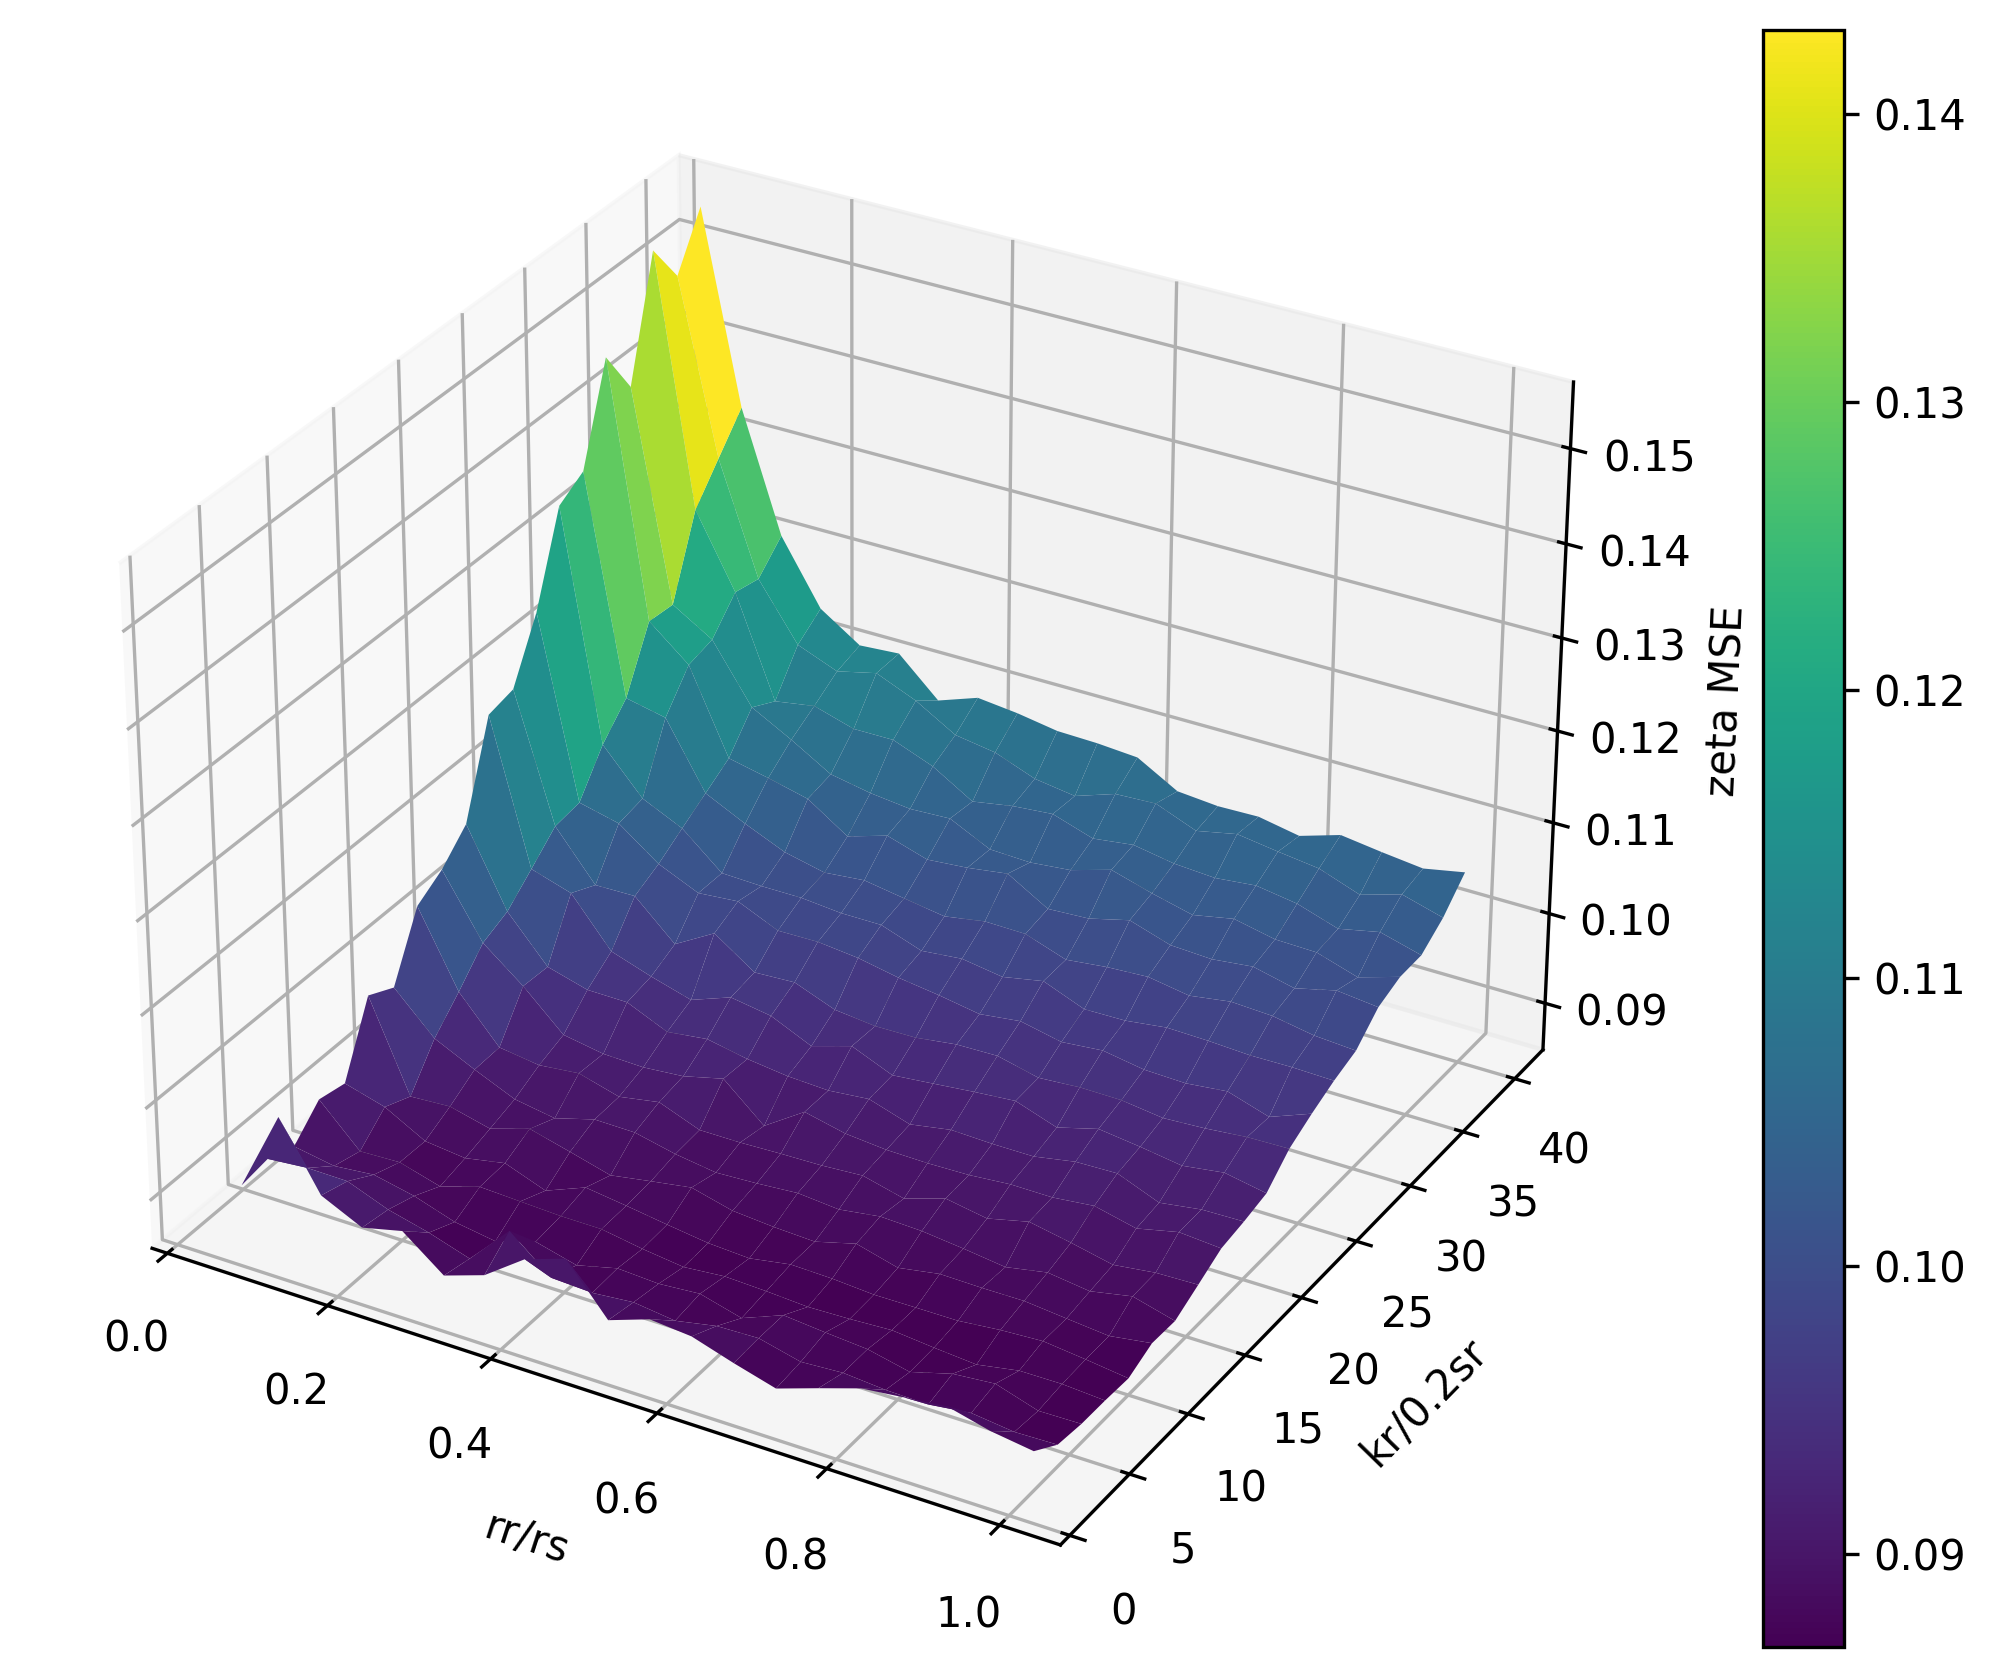

In [15]:
Z = zeta_errors

fig = plt.figure(figsize=(10, 7), dpi=300)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

fig.colorbar(surf)

# Labels
ax.set_xlabel('rr/rs')
ax.set_ylabel('kr/0.2sr')
ax.set_zlabel('zeta MSE')

# Save the plot with high resolution (PPI 300)
#plt.savefig("3d_surface_plot.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()